In [12]:
import numpy as np
np.random.seed(42) # set seed will make the initialized random number to be the same
real = lambda x: x + x ** 0.1 

In [18]:
# setup training data
x_train = np.linspace(0, 15, 100) # return evenly spaced numbers over a specified interval [0, 15]
y_train = np.array(list(map(real, x_train))) # map function to iterable
y_noise = 2 * np.random.normal(size = x_train.size)
y_train = y_train + y_noise
# print(y_train)

# setup validate data
x_valid = np.linspace(0, 15, 50)
y_valid = np.array(list(map(real, x_valid)))
y_noise = 2 * np.random.normal(size = x_valid.size)
y_valid = y_valid + y_noise
# print(y_valid)

In [24]:
prop = np.polyfit(x_train, y_train, 1) # esitmate the coefficients 
prop_polynomial = np.poly1d(prop) # return one-dimensional polynomial class
overfit = np.polyfit(x_train, y_train, 15)
overfit_polynomial = np.poly1d(overfit)
# print(overfit_polynomial)

Text(0.5, 1.0, 'train set')

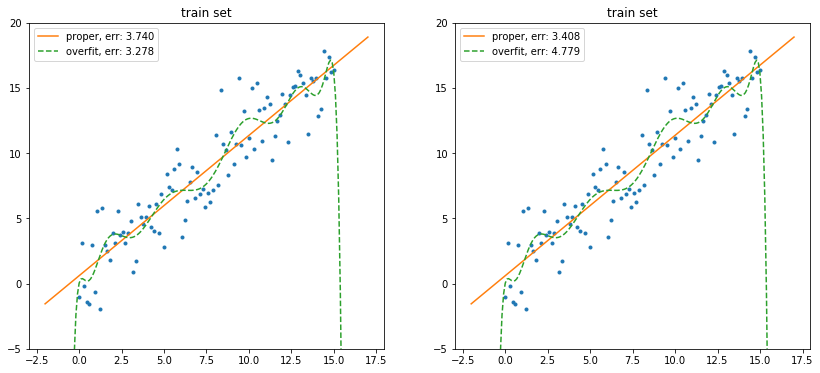

In [35]:
import matplotlib.pyplot as plt

_ = plt.figure(figsize = (14, 6))

xp = np.linspace(-2, 17, 200) # distribution of x 

# plot the train set 
plt.subplot(1, 2, 1)
prop_e  = np.mean((y_train - np.polyval(prop, x_train)) ** 2)
overfit_e = np.mean((y_train - np.polyval(overfit, x_train)) ** 2)

plt.plot(x_train, y_train, '.') # '.' means to plot using '.'
plt.plot(xp, prop_polynomial(xp), '-', label = 'proper, err: %.3f'%(prop_e))
plt.plot(xp, overfit_polynomial(xp), '--', label = 'overfit, err: %.3f'%(overfit_e))
plt.ylim(-5, 20)
plt.legend() # add plot label at the left top
plt.title('train set')

# plot the validation set
plt.subplot(1, 2, 2)
prop_e = np.mean((y_valid - np.polyval(prop, x_valid)) ** 2)
overfit_e = np.mean((y_valid - np.polyval(overfit, x_valid)) ** 2)

plt.plot(x_train, y_train, '.')
plt.plot(xp, prop_polynomial(xp), '-', label = 'proper, err: %.3f'%(prop_e))
plt.plot(xp, overfit_polynomial(xp), '--', label = 'overfit, err: %.3f'%(overfit_e))
plt.ylim(-5, 20)
plt.legend() # add plot label at the left top
plt.title('validation set')

From the above two plots, we can see the overfit estimator can have a smaller mean square error compared to the proper estimator using train set. But it has a larger mean square error if we use a validation set since there are new dataset.